In [ ]:
# for running on Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from skimage import color
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
dict_type = {
    'cailuong'  : 'CaiLuong',
    'catru'     : 'Catru',
    'cheo'      : 'Cheo'
}

In [ ]:
import gc

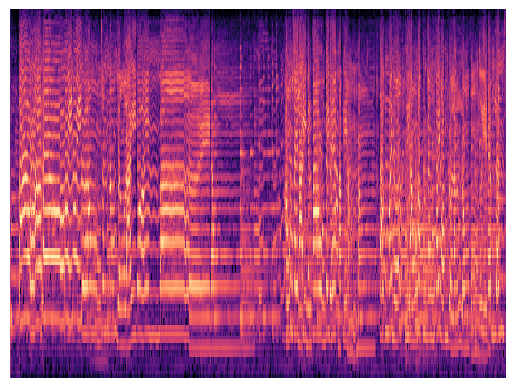

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/MyDrive/datasets/image/cailuong/CaiLuong.051.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img.shape

(369, 496, 4)

In [ ]:
def resize_image(image, target_size=(150, 150)):
    try:
        image = cv2.resize(image, target_size)
        return image
    except Exception as e:
        print(f"Error resizing image: {e}")
        return None

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from skimage import color

# Đường dẫn tới thư mục ảnh
image_root_folder = "/content/drive/MyDrive/datasets/image/"

# Hàm để trích xuất đặc trưng HOG
def extract_hog_features(image):
    image = resize_image(image)
    if image is None:
        return None
    # Chuyển đổi sang ảnh grayscale nếu cần
    if len(image.shape) == 3:
        image = color.rgb2gray(image)

    # Trích xuất đặc trưng HOG
    features, hog_image = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True
    )
    return features

# Danh sách lưu trữ đặc trưng và nhãn
data = []

# Duyệt qua tất cả các folder con (các thể loại) trong thư mục gốc
for genre_folder in os.listdir(image_root_folder):
    genre_path = os.path.join(image_root_folder, genre_folder)

    # Kiểm tra nếu genre_path là một folder
    if os.path.isdir(genre_path):
        # Duyệt qua tất cả các file ảnh trong folder
        for file_name in os.listdir(genre_path):
            if file_name.lower().endswith((".png", ".jpg", ".jpeg")):
                # Đường dẫn đầy đủ tới ảnh
                image_path = os.path.join(genre_path, file_name)

                try:
                    # Đọc ảnh
                    image = cv2.imread(image_path)

                    if image is None:
                        print(f"Failed to read image {image_path}")
                        continue

                    # Trích xuất đặc trưng HOG
                    features = extract_hog_features(image)

                    # Thêm đặc trưng và nhãn vào danh sách
                    data.append({
                        "Genres": genre_folder,  # Tên folder là thể loại
                        "Features": features    # Đặc trưng HOG
                    })

                    print(f"Processed {file_name} in {genre_folder}: {len(features)} HOG features extracted.")

                except Exception as e:
                    print(f"Error processing file {image_path}: {e}")

# Chuyển danh sách thành DataFrame
feature_df = pd.DataFrame(data)


Processed Cheo.494.png in cheo: 10404 HOG features extracted.
Processed Cheo.444.png in cheo: 10404 HOG features extracted.
Processed Cheo.490.png in cheo: 10404 HOG features extracted.
Processed Cheo.457.png in cheo: 10404 HOG features extracted.
Processed Cheo.456.png in cheo: 10404 HOG features extracted.
Processed Cheo.493.png in cheo: 10404 HOG features extracted.
Processed Cheo.497.png in cheo: 10404 HOG features extracted.
Processed Cheo.440.png in cheo: 10404 HOG features extracted.
Processed Cheo.476.png in cheo: 10404 HOG features extracted.
Processed Cheo.462.png in cheo: 10404 HOG features extracted.
Processed Cheo.495.png in cheo: 10404 HOG features extracted.
Processed Cheo.442.png in cheo: 10404 HOG features extracted.
Processed Cheo.483.png in cheo: 10404 HOG features extracted.
Processed Cheo.464.png in cheo: 10404 HOG features extracted.
Processed Cheo.463.png in cheo: 10404 HOG features extracted.
Processed Cheo.487.png in cheo: 10404 HOG features extracted.
Processe

In [ ]:
feature_df

Genres  \
0         cheo   
1         cheo   
2         cheo   
3         cheo   
4         cheo   
5         cheo   
6         cheo   
7         cheo   
8         cheo   
9         cheo   
10        cheo   
11        cheo   
12        cheo   
13        cheo   
14        cheo   
15        cheo   
16        cheo   
17        cheo   
18        cheo   
19        cheo   
20        cheo   
21        cheo   
22        cheo   
23        cheo   
24        cheo   
25        cheo   
26        cheo   
27        cheo   
28        cheo   
29        cheo   
30        cheo   
31        cheo   
32        cheo   
33        cheo   
34        cheo   
35        cheo   
36        cheo   
37        cheo   
38        cheo   
39        cheo   
40        cheo   
41        cheo   
42        cheo   
43        cheo   
44        cheo   
45        cheo   
46        cheo   
47        cheo   
48        cheo   
49        cheo   
50        cheo   
51        cheo   
52        cheo   
53        cheo   
54        cheo   
55        cheo   
56        cheo   
57        cheo   
58        cheo   
59        cheo   
60        cheo   
61        cheo   
62        cheo   
63        cheo   
64        cheo   
65        cheo   
66        cheo   
67        cheo   
68        cheo   
69        cheo   
70        cheo   
71        cheo   
72        cheo   
73        cheo   
74        cheo   
75        cheo   
76        cheo   
77        cheo   
78        cheo   
79        cheo   
80        cheo   
81        cheo   
82        cheo   
83        cheo   
84        cheo   
85        cheo   
86        cheo   
87        cheo   
88        cheo   
89        cheo   
90        cheo   
91        cheo   
92        cheo   
93        cheo   
94        cheo   
95        cheo   
96        cheo   
97        cheo   
98        cheo   
99        cheo   
100       cheo   
101       cheo   
102       cheo   
103       cheo   
104       cheo   
105       cheo   
106       cheo   
107       cheo   
108       cheo   
109       cheo   
110       cheo   
111       cheo   
112       cheo   
113       cheo   
114       cheo   
115       cheo   
116       cheo   
117       cheo   
118       cheo   
119       cheo   
120       cheo   
121       cheo   
122       cheo   
123       cheo   
124       cheo   
125       cheo   
126       cheo   
127       cheo   
128       cheo   
129       cheo   
130       cheo   
131       cheo   
132       cheo   
133       cheo   
134       cheo   
135       cheo   
136       cheo   
137       cheo   
138       cheo   
139       cheo   
140       cheo   
141       cheo   
142       cheo   
143       cheo   
144       cheo   
145       cheo   
146       cheo   
147       cheo   
148       cheo   
149       cheo   
150       cheo   
151       cheo   
152       cheo   
153       cheo   
154       cheo   
155       cheo   
156       cheo   
157       cheo   
158       cheo   
159       cheo   
160       cheo   
161       cheo   
162       cheo   
163       cheo   
164       cheo   
165       cheo   
166       cheo   
167       cheo   
168       cheo   
169       cheo   
170       cheo   
171       cheo   
172       cheo   
173       cheo   
174       cheo   
175       cheo   
176       cheo   
177       cheo   
178       cheo   
179       cheo   
180       cheo   
181       cheo   
182       cheo   
183       cheo   
184       cheo   
185       cheo   
186       cheo   
187       cheo   
188       cheo   
189       cheo   
190       cheo   
191       cheo   
192       cheo   
193       cheo   
194       cheo   
195       cheo   
196       cheo   
197       cheo   
198       cheo   
199       cheo   
200       cheo   
201       cheo   
202       cheo   
203       cheo   
204       cheo   
205       cheo   
206       cheo   
207       cheo   
208       cheo   
209       cheo   
210       cheo   
211       cheo   
212       cheo   
213       cheo   
214       cheo   
215       cheo   
216       cheo   
217       cheo   
218       cheo   
219       cheo   
220       cheo   
221       ch

In [ ]:
# Lưu DataFrame thành tệp CSV
output_csv_path = "/content/drive/MyDrive/datasets/hog_features.csv"
feature_df.to_csv(output_csv_path, index=False)
print(f"HOG features saved to {output_csv_path}")

HOG features saved to /content/drive/MyDrive/datasets/hog_features.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn thành số
label_encoder = LabelEncoder()
feature_df['Encoded_Labels'] = label_encoder.fit_transform(feature_df['Genres'])

In [ ]:
# Tách đặc trưng và nhãn
X = np.array(feature_df['Features'].tolist())
y = feature_df['Encoded_Labels'].values

# Chia dữ liệu thành tập train, test, dev
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Tìm kiếm siêu tham số cho SVM
svm_parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}
svm = SVC(random_state=42)
svm_grid = GridSearchCV(svm, svm_parameters, cv=3, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("\nBest parameters for SVM:")
print(svm_grid.best_params_)

# Lưu mô hình SVM
svm_model_path = "/content/drive/MyDrive/datasets/svm_grid_model.pkl"
joblib.dump(svm_grid, svm_model_path)
print(f"SVM model saved to {svm_model_path}")

# Dự đoán và đánh giá trên tập test
svm_best = svm_grid.best_estimator_
y_pred_test_svm = svm_best.predict(X_test)
print("\nSVM Test Set Evaluation:")
print(classification_report(y_test, y_pred_test_svm))


Best parameters for SVM:
{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
SVM model saved to /content/drive/MyDrive/datasets/svm_grid_model.pkl

SVM Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        86
           1       0.93      0.92      0.92       110
           2       0.98      0.82      0.89       104

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



In [ ]:
# Tìm kiếm siêu tham số cho KNN
knn_parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_parameters, cv=3, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("\nBest parameters for KNN:")
print(knn_grid.best_params_)

# Lưu mô hình KNN
knn_model_path = "/content/drive/MyDrive/datasets/knn_grid_model.pkl"
joblib.dump(knn_grid, knn_model_path)
print(f"KNN model saved to {knn_model_path}")

# Dự đoán và đánh giá trên tập test
knn_best = knn_grid.best_estimator_
y_pred_test_knn = knn_best.predict(X_test)
print("\nKNN Test Set Evaluation:")
print(classification_report(y_test, y_pred_test_knn))


Best parameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
KNN model saved to /content/drive/MyDrive/datasets/knn_grid_model.pkl

KNN Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75        86
           1       0.85      0.85      0.85       110
           2       0.97      0.74      0.84       104

    accuracy                           0.81       300
   macro avg       0.83      0.82      0.81       300
weighted avg       0.84      0.81      0.82       300

